In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

cb=pd.read_excel('covid19_Brazil.xlsx')
cb.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cb.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [4]:
cb.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [5]:
cb.shape

(5644, 111)

In [6]:
cb.columns.unique()

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
cb['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [8]:
#Converting the exam-result into 0,1 (0=negative,1=positive)

cb['SARS-Cov-2 exam result']=cb['SARS-Cov-2 exam result'].replace(['negative','positive'],[0,1])

In [9]:
cb['SARS-Cov-2 exam result'].unique()

array([0, 1], dtype=int64)

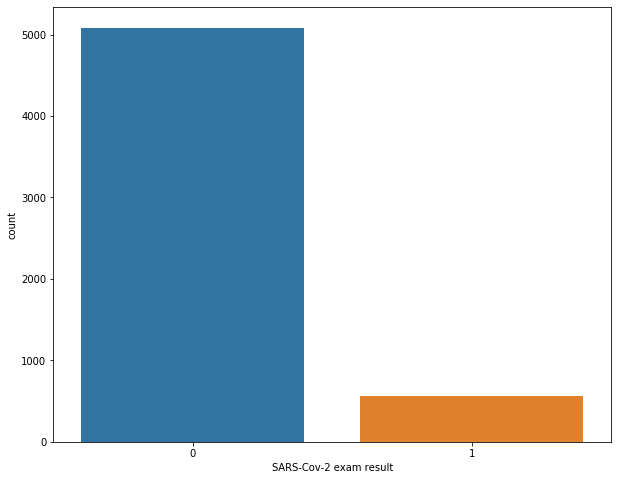

In [10]:
plt.figure(figsize=(10,8))
sbn.countplot('SARS-Cov-2 exam result',data=cb)

In [11]:
#Lets check the no. of postitive and negative cases in the data

print('no. of positive cases:',len(cb[cb['SARS-Cov-2 exam result']==1]))
print('no. of negative cases:',len(cb[cb['SARS-Cov-2 exam result']==0]))

no. of positive cases: 558
no. of negative cases: 5086


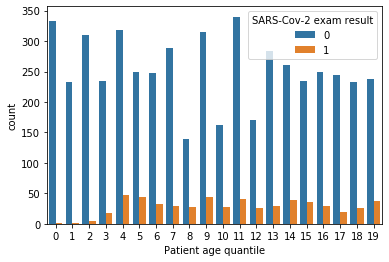

In [12]:
#lets check the exam result wrt age

sbn.countplot('Patient age quantile',hue='SARS-Cov-2 exam result',data=cb)

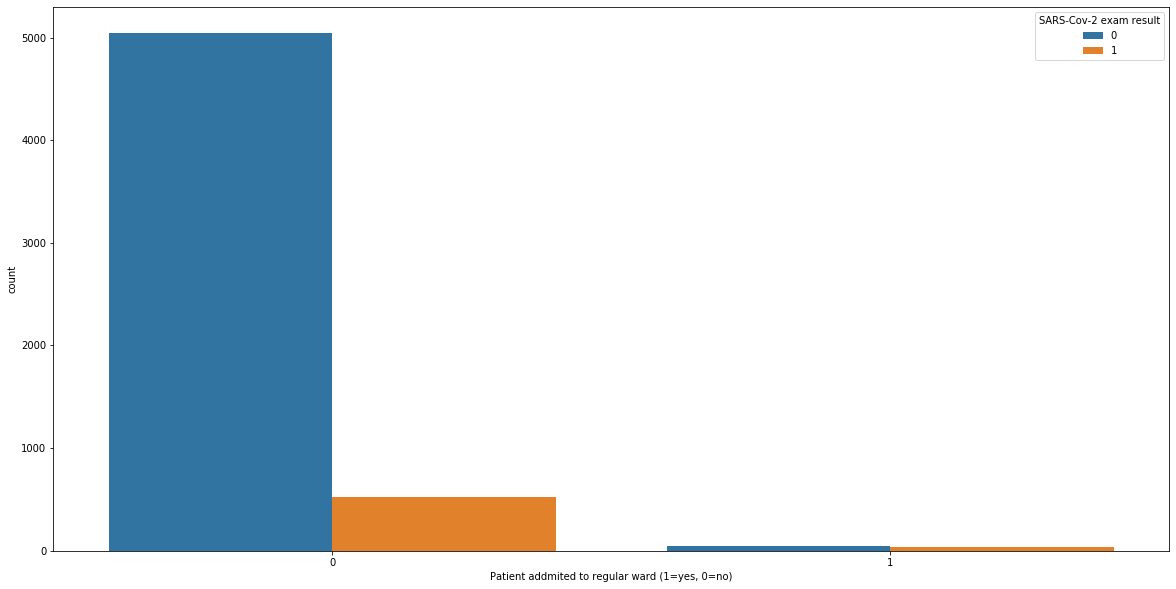

In [13]:
#checking the exam result wrt ward
plt.figure(figsize=(20,10))
sbn.countplot('Patient addmited to regular ward (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=cb)

from the above plot,it is observed that most of the patients are not admitted to regular ward 

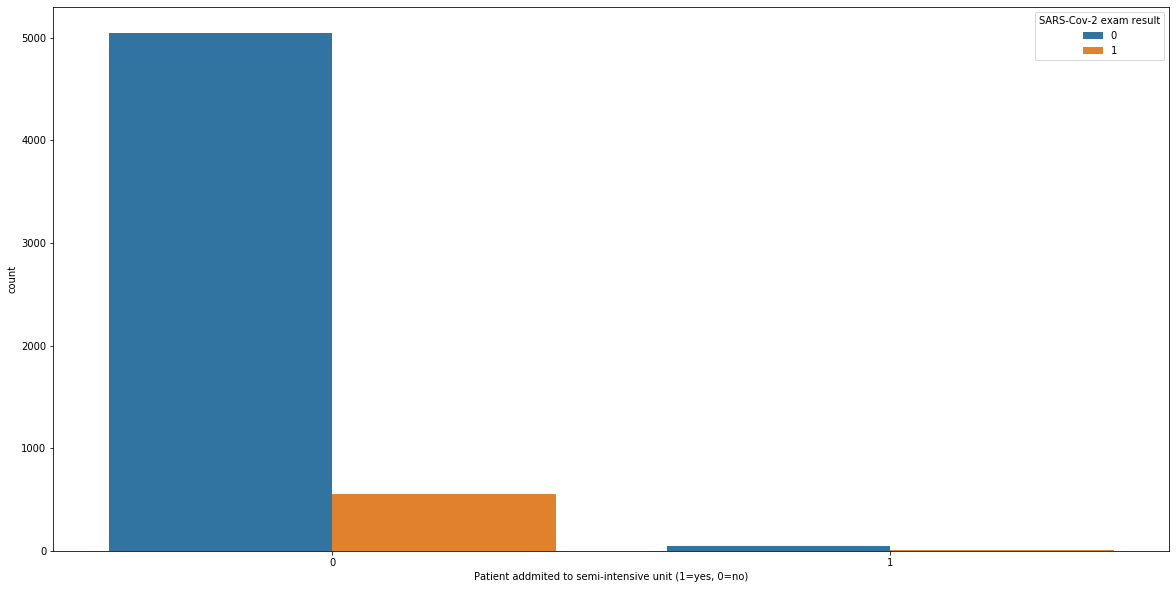

In [14]:
plt.figure(figsize=(20,10))
sbn.countplot('Patient addmited to semi-intensive unit (1=yes, 0=no)',hue='SARS-Cov-2 exam result',data=cb)

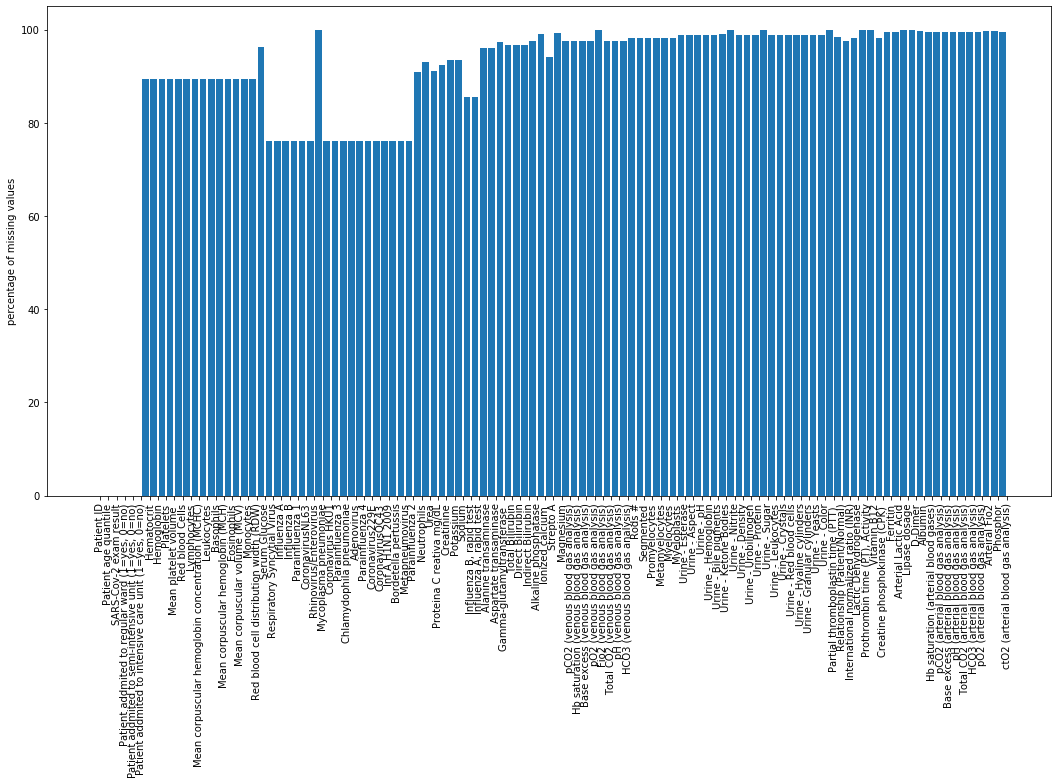

In [15]:
#lets look at the number of total missing values in the features

missing_vals=cb.isnull().sum()*100/len(cb)
plt.figure(figsize=(18,9))
plt.xticks(np.arange(len(missing_vals))+0.5,missing_vals.index,rotation=(90))
plt.ylabel('percentage of missing values')
plt.bar(np.arange(len(missing_vals)),missing_vals)
plt.show()    

By looking at the above plot, there are hardly 6 columns without null values and every other feature has more than 75% of null values.

here,considering the features without null values

In [16]:
#lets check the features without null values

cbn=cb.isnull().sum()
cn=cbn[cbn==0].reset_index()
cn

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0
5,Patient addmited to intensive care unit (1=yes...,0


In [17]:
#Creating new dataframe with features containing non-null values

cbfin=cb[cn['index']]
cbfin.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,0,0,0,0
1,126e9dd13932f68,17,0,0,0,0
2,a46b4402a0e5696,8,0,0,0,0
3,f7d619a94f97c45,5,0,0,0,0
4,d9e41465789c2b5,15,0,0,0,0


In [18]:
cbfin.shape

(5644, 6)

In [19]:
cbf=cbfin.drop('Patient ID',axis=1)

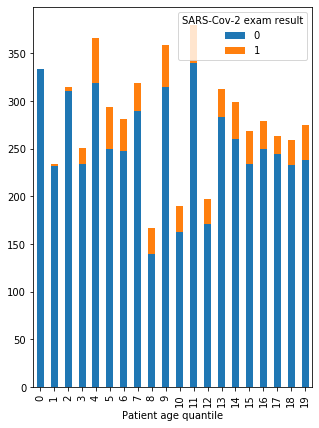

In [20]:
cbf.groupby(['Patient age quantile','SARS-Cov-2 exam result']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,7))

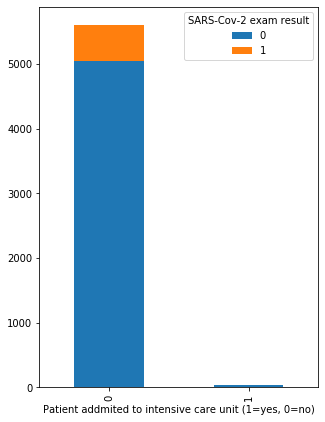

In [21]:
cbf.groupby(['Patient addmited to intensive care unit (1=yes, 0=no)','SARS-Cov-2 exam result']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,7))

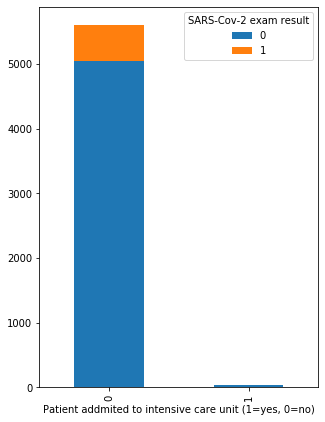

In [26]:
cbf.groupby(['Patient addmited to intensive care unit (1=yes, 0=no)','SARS-Cov-2 exam result']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,7))

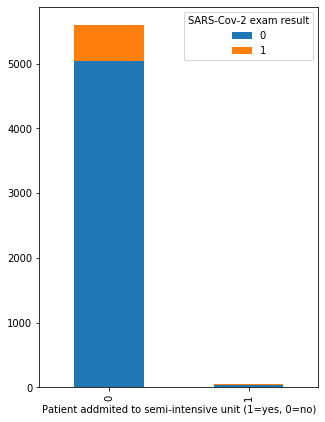

In [27]:
cbf.groupby(['Patient addmited to semi-intensive unit (1=yes, 0=no)','SARS-Cov-2 exam result']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,7))

In [29]:
cbf

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0,0
1,17,0,0,0,0
2,8,0,0,0,0
3,5,0,0,0,0
4,15,0,0,0,0
...,...,...,...,...,...
5639,3,1,0,0,0
5640,17,0,0,0,0
5641,4,0,0,0,0
5642,10,0,0,0,0


In [35]:
cbf.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
Patient age quantile,1.000000,0.075244,0.046166,0.015736,-0.035772
SARS-Cov-2 exam result,0.075244,1.000000,0.142437,0.019364,0.027586
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,0.142437,1.000000,-0.011264,-0.010192
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.019364,-0.011264,1.000000,-0.008087
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,0.027586,-0.010192,-0.008087,1.000000


although,the features are without null values, the columns are indepedent

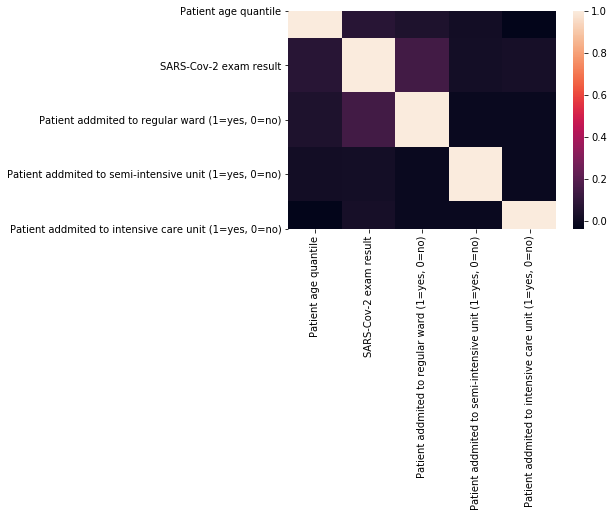

In [36]:
sbn.heatmap(cbf.corr())

The above heatmap shows, features are less correlated..

In [39]:
cbf.groupby(['Patient age quantile'])['SARS-Cov-2 exam result'].value_counts(ascending=True)

Patient age quantile  SARS-Cov-2 exam result
0                     1                           1
                      0                         333
1                     1                           2
                      0                         232
2                     1                           5
                      0                         310
3                     1                          17
                      0                         234
4                     1                          47
                      0                         319
5                     1                          44
                      0                         250
6                     1                          33
                      0                         248
7                     1                          30
                      0                         289
8                     1                          27
                      0                         140
9                  

In [40]:
cbf.groupby(['Patient addmited to regular ward (1=yes, 0=no)'])['SARS-Cov-2 exam result'].value_counts(ascending=True)

Patient addmited to regular ward (1=yes, 0=no)  SARS-Cov-2 exam result
0                                               1                          522
                                                0                         5043
1                                               1                           36
                                                0                           43
Name: SARS-Cov-2 exam result, dtype: int64

It is observed that most of the cases are negative and most patients are not admitted in regular ward.

In [30]:
#Seperating the feature and label..

x=cbf.drop('SARS-Cov-2 exam result',axis=1)

In [31]:
y=cbf['SARS-Cov-2 exam result']

In [32]:
x.shape

(5644, 4)

In [33]:
y.shape

(5644,)

In [41]:
x.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,0,0,0
1,17,0,0,0
2,8,0,0,0
3,5,0,0,0
4,15,0,0,0


In [42]:
#Bringing down the features to common scale

sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [44]:
#Selecting the max accuracy,best random state

def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [45]:
#Performing several models to find best score..
lor=LogisticRegression()
accuracy(lor,x,y)

Accuracy is 0.9114331723027376 for the random state 40
Accuracy is 0.9025764895330113 for the random state 41
Accuracy is 0.9074074074074074 for the random state 42
Accuracy is 0.9017713365539453 for the random state 43
Accuracy is 0.9106280193236715 for the random state 44
Accuracy is 0.8913043478260869 for the random state 45
Accuracy is 0.9025764895330113 for the random state 46
Accuracy is 0.9106280193236715 for the random state 47
Accuracy is 0.892914653784219 for the random state 48
Accuracy is 0.9074074074074074 for the random state 49
Accuracy is 0.8921095008051529 for the random state 50
Accuracy is 0.9025764895330113 for the random state 51
Accuracy is 0.8985507246376812 for the random state 52
Accuracy is 0.9049919484702094 for the random state 53
Accuracy is 0.9082125603864735 for the random state 54
Accuracy is 0.9009661835748792 for the random state 55
Accuracy is 0.892914653784219 for the random state 56
Accuracy is 0.8969404186795491 for the random state 57
Accuracy is 

70

In [46]:
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

Accuracy is 0.9146537842190016 for the random state 40
Accuracy is 0.9049919484702094 for the random state 41
Accuracy is 0.9057971014492754 for the random state 42
Accuracy is 0.9009661835748792 for the random state 43
Accuracy is 0.9090177133655395 for the random state 44
Accuracy is 0.892914653784219 for the random state 45
Accuracy is 0.9001610305958132 for the random state 46
Accuracy is 0.9057971014492754 for the random state 47
Accuracy is 0.8921095008051529 for the random state 48
Accuracy is 0.9082125603864735 for the random state 49
Accuracy is 0.895330112721417 for the random state 50
Accuracy is 0.9057971014492754 for the random state 51
Accuracy is 0.8969404186795491 for the random state 52
Accuracy is 0.9057971014492754 for the random state 53
Accuracy is 0.9114331723027376 for the random state 54
Accuracy is 0.8977455716586151 for the random state 55
Accuracy is 0.895330112721417 for the random state 56
Accuracy is 0.8961352657004831 for the random state 57
Accuracy is 0

70

In [47]:
kn=KNeighborsClassifier(n_neighbors=3)
accuracy(kn,x,y)

Accuracy is 0.8276972624798712 for the random state 40
Accuracy is 0.855877616747182 for the random state 41
Accuracy is 0.9066022544283414 for the random state 42
Accuracy is 0.9001610305958132 for the random state 43
Accuracy is 0.8760064412238325 for the random state 44
Accuracy is 0.8961352657004831 for the random state 45
Accuracy is 0.9001610305958132 for the random state 46
Accuracy is 0.9049919484702094 for the random state 47
Accuracy is 0.8011272141706924 for the random state 48
Accuracy is 0.8711755233494364 for the random state 49
Accuracy is 0.894524959742351 for the random state 50
Accuracy is 0.8494363929146538 for the random state 51
Accuracy is 0.8977455716586151 for the random state 52
Accuracy is 0.9090177133655395 for the random state 53
Accuracy is 0.9114331723027376 for the random state 54
Accuracy is 0.8615136876006442 for the random state 55
Accuracy is 0.894524959742351 for the random state 56
Accuracy is 0.8977455716586151 for the random state 57
Accuracy is 0

70

In [48]:
sv=SVC(kernel='rbf')
accuracy(sv,x,y)

Accuracy is 0.9154589371980676 for the random state 40
Accuracy is 0.9049919484702094 for the random state 41
Accuracy is 0.9090177133655395 for the random state 42
Accuracy is 0.9009661835748792 for the random state 43
Accuracy is 0.9106280193236715 for the random state 44
Accuracy is 0.894524959742351 for the random state 45
Accuracy is 0.9025764895330113 for the random state 46
Accuracy is 0.9090177133655395 for the random state 47
Accuracy is 0.8969404186795491 for the random state 48
Accuracy is 0.9082125603864735 for the random state 49
Accuracy is 0.893719806763285 for the random state 50
Accuracy is 0.9074074074074074 for the random state 51
Accuracy is 0.8985507246376812 for the random state 52
Accuracy is 0.9122383252818036 for the random state 53
Accuracy is 0.9122383252818036 for the random state 54
Accuracy is 0.9033816425120773 for the random state 55
Accuracy is 0.8961352657004831 for the random state 56
Accuracy is 0.8961352657004831 for the random state 57
Accuracy is 

70

In [49]:
rf=RandomForestClassifier(n_estimators=5)
accuracy(rf,x,y)

Accuracy is 0.9154589371980676 for the random state 40
Accuracy is 0.9041867954911433 for the random state 41
Accuracy is 0.9090177133655395 for the random state 42
Accuracy is 0.9017713365539453 for the random state 43
Accuracy is 0.9090177133655395 for the random state 44
Accuracy is 0.895330112721417 for the random state 45
Accuracy is 0.9001610305958132 for the random state 46
Accuracy is 0.9049919484702094 for the random state 47
Accuracy is 0.8921095008051529 for the random state 48
Accuracy is 0.9074074074074074 for the random state 49
Accuracy is 0.8921095008051529 for the random state 50
Accuracy is 0.9066022544283414 for the random state 51
Accuracy is 0.8961352657004831 for the random state 52
Accuracy is 0.9057971014492754 for the random state 53
Accuracy is 0.9114331723027376 for the random state 54
Accuracy is 0.9001610305958132 for the random state 55
Accuracy is 0.895330112721417 for the random state 56
Accuracy is 0.8969404186795491 for the random state 57
Accuracy is 

70

In [51]:
#Cross validating the logistic regression model.
cvs=cross_val_score(lor,x,y,cv=5,scoring='accuracy')
print('mean accuracy of logistic regression is ',cvs.mean())
print('Standard deviation of the model is ',cvs.std())


mean accuracy of logistic regression is  0.8981201279249683
Standard deviation of the model is  0.00538103042901538


In [56]:
#Fitting the best model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=.22)
lor.fit(x_train,y_train)
predy=lor.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is ',accuracy_score(y_test,predy))
print('Confusion matrix for the model',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))
lorp=lor.predict_proba(x_train)
lorp=lorp[:,1]
auc=roc_auc_score(y_train,lorp)
print('ROC AUC =%.3f'%(auc))

Accuracy is  0.9251207729468599
Confusion matrix for the model [[1145    3]
 [  90    4]]
Classification report               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1148
           1       0.57      0.04      0.08        94

    accuracy                           0.93      1242
   macro avg       0.75      0.52      0.52      1242
weighted avg       0.90      0.93      0.89      1242

ROC AUC =0.586


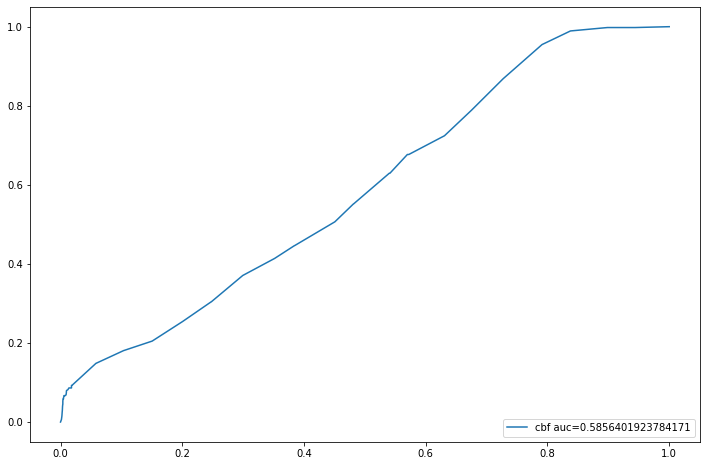

In [61]:
plt.figure(figsize=(12,8))
yprob=lor.predict_proba(x_train)[::,1]
fpr,tpr,_ =roc_curve(y_train,yprob)
auc=roc_auc_score(y_train,yprob)
plt.plot(fpr,tpr,label='cbf auc='+str(auc))
plt.legend(loc=4)
plt.show()

Above plot represents area under curve for the model which is 0.58 in this case.

In [62]:
#Saving predictions and the model
pdict=pd.DataFrame(predy,columns=['SARS-Cov-2 exam result'])
pdict=pdict.to_csv('covidbrazilpredictions.csv',index=False)

In [63]:
#Saving the model
import joblib
joblib.dump(lor,'covidbrazilpredictions.pkl')

['covidbrazilpredictions.pkl']